In [ ]:
# Tarea de Inteligencia Artificial N°2
# Estudiantes:

# Bastián Ortiz de Zárate

# Felipe Infante

# Profesor:

# Víctor Reyes Rodríguez

# Ayudantes:

# Franco Ramírez

# Matias Sotelo

In [3]:
# Dataset usado
"https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data"

'https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Cargar dataset (ajusta la ruta según tu archivo descargado)
csv_path = 'Downloads/covtype.csv'  # cambia si es necesario
try:
    df = pd.read_csv(csv_path)
    print(f"✅ Dataset cargado correctamente: {csv_path}")
    print(f"Filas: {len(df)} | Columnas: {len(df.columns)}")
except FileNotFoundError:
    raise FileNotFoundError("No se encontró el archivo CSV. Revisa la ruta o el nombre del archivo.")

display(df.head())
df.info()

✅ Dataset cargado correctamente: Downloads/covtype.csv
Filas: 581012 | Columnas: 55


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 


=== Frecuencia de clases en Cover_Type ===


,Frecuencia Absoluta,Frecuencia Relativa (%)
Cover_Type,,
1,211840,36.46
2,283301,48.76
3,35754,6.15
4,2747,0.47
5,9493,1.63
6,17367,2.99
7,20510,3.53


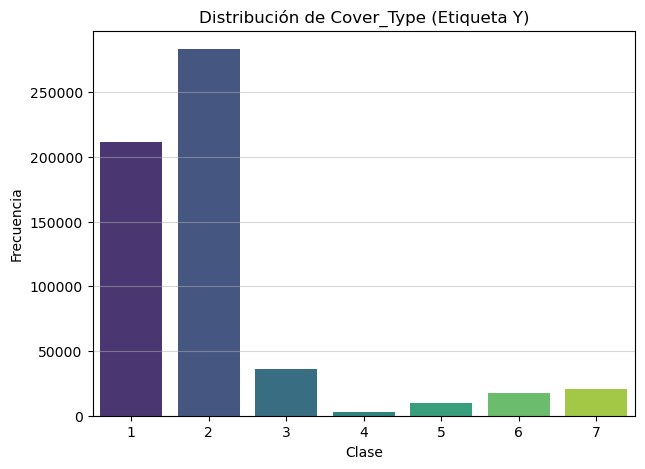

⚠️ El dataset presenta desbalance importante.


In [3]:
# --- CELDA 2: Definición de Y y X, y análisis de frecuencia ---
Y = df['Cover_Type']
X = df.drop(columns=['Cover_Type'])

print("\n=== Frecuencia de clases en Cover_Type ===")
frecuencia_abs = Y.value_counts().sort_index()
frecuencia_rel = Y.value_counts(normalize=True).sort_index() * 100
display(pd.DataFrame({'Frecuencia Absoluta': frecuencia_abs, 'Frecuencia Relativa (%)': frecuencia_rel.round(2)}))

plt.figure(figsize=(7,5))
sns.barplot(x=frecuencia_abs.index, y=frecuencia_abs.values, palette="viridis")
plt.title("Distribución de Cover_Type (Etiqueta Y)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.5)
plt.show()

# Análisis de balance
diff = frecuencia_rel.max() - frecuencia_rel.min()
if diff > 15:
    print("⚠️ El dataset presenta desbalance importante.")
elif diff > 5:
    print("⚠️ El dataset presenta desbalance moderado.")
else:
    print("✅ Dataset balanceado (las clases están bien distribuidas).")

In [ ]:
# Parte1 

In [4]:
# --- CELDA 2.5 - Reducción estratificada del dataset ---
from sklearn.model_selection import train_test_split

# 🔹 Tamaño del subconjunto (por ejemplo, 50.000 filas)
subset_size = 10000

# Separa X e Y antes del muestreo
Y_full = df['Cover_Type']
X_full = df.drop(columns=['Cover_Type'])

# Calcular proporción que representa el subset respecto al total
frac = subset_size / len(df)

# Usar train_test_split con stratify para mantener la frecuencia de clases
X_reducido, _, Y_reducido, _ = train_test_split(
    X_full, Y_full,
    train_size=frac,
    stratify=Y_full,
    random_state=42
)

print("✅ Subconjunto estratificado creado correctamente.")
print("Tamaño original:", df.shape)
print("Tamaño reducido:", X_reducido.shape)

# Reemplazar df, X y Y por los reducidos
df = pd.concat([X_reducido, Y_reducido], axis=1)
X = X_reducido
Y = Y_reducido

# Mostrar la nueva distribución de clases para verificar proporciones
print("\n=== Distribución de clases en el dataset reducido ===")
print(Y.value_counts(normalize=True).round(3) * 100)


✅ Subconjunto estratificado creado correctamente.
Tamaño original: (581012, 55)
Tamaño reducido: (10000, 54)

=== Distribución de clases en el dataset reducido ===
Cover_Type
2    48.8
1    36.5
3     6.2
7     3.5
6     3.0
5     1.6
4     0.5
Name: proportion, dtype: float64


In [5]:
# --- CELDA 3: Identificación de columnas continuas y categóricas ---
# En este dataset todas las columnas son numéricas (enteras o continuas)
columnas_continuas = [c for c in X.columns if X[c].nunique() > 10]
columnas_binarias = [c for c in X.columns if X[c].nunique() == 2]

print("\nColumnas continuas:", len(columnas_continuas))
print(columnas_continuas[:10], "...")
print("Columnas binarias (dummy):", len(columnas_binarias))


Columnas continuas: 10
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'] ...
Columnas binarias (dummy): 43


In [6]:
# --- CELDA 4: Preprocesamiento y ajuste de nombres automático ---

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1️⃣ Crear escalador y preprocesador
scaler = StandardScaler()
preprocesador = ColumnTransformer(
    transformers=[('scale', scaler, columnas_continuas)],
    remainder='passthrough'  # deja pasar las otras columnas
)

# 2️⃣ Aplicar transformaciones
X_proc = preprocesador.fit_transform(X)

# 3️⃣ Obtener nombres de columnas finales (automático)
nombres_columnas = []
if 'scale' in preprocesador.named_transformers_:
    nombres_columnas += columnas_continuas

# Agregar las columnas que se pasaron sin transformar
otras_columnas = [col for col in X.columns if col not in columnas_continuas]
nombres_columnas += otras_columnas

# ⚙️ Verificación de coincidencia
if X_proc.shape[1] != len(nombres_columnas):
    print(f"⚠️ Mismatch detectado ({X_proc.shape[1]} columnas vs {len(nombres_columnas)} nombres).")
    nombres_columnas = [f"col_{i}" for i in range(X_proc.shape[1])]

# 4️⃣ Crear DataFrame final procesado
X_proc = pd.DataFrame(X_proc, columns=nombres_columnas)

print("\n✅ Preprocesamiento completado correctamente.")
print("Dimensiones finales:", X_proc.shape)
display(X_proc.head())



✅ Preprocesamiento completado correctamente.
Dimensiones finales: (10000, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.669804,-0.498303,-0.427556,0.140143,-0.562699,-0.990935,0.994180,0.087279,-0.719880,-1.075416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.447582,-0.471565,-0.561188,-0.953532,-0.796957,0.430808,0.957417,0.189762,-0.615870,2.766488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.523016,-0.008115,0.775133,-1.127206,-0.947552,-0.497400,0.957417,0.753415,-0.615870,-0.395300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.787190,1.052474,0.374237,-0.169653,0.273938,-1.260665,-1.468936,0.958380,1.698345,-0.471624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315494,-1.095441,-0.026660,3.238109,3.001376,-0.732201,0.185395,-0.835063,-0.537863,0.374744,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# --- CELDA 5: División estratificada 80/20 ---
X_train, X_test, Y_train, Y_test = train_test_split(
    X_proc, Y, test_size=0.2, stratify=Y, random_state=42
)
print("\n✅ División realizada.")
print(f"Tamaño X_train: {X_train.shape}, X_test: {X_test.shape}")
print("Distribución de clases en Y_train:")
print(Y_train.value_counts(normalize=True).round(3) * 100)



✅ División realizada.
Tamaño X_train: (8000, 54), X_test: (2000, 54)
Distribución de clases en Y_train:
Cover_Type
2    48.8
1    36.5
3     6.2
7     3.5
6     3.0
5     1.6
4     0.5
Name: proportion, dtype: float64


In [8]:
# --- CELDA 6: Entrenamiento de modelos de clustering (fix para Windows) ---
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # 🔧 evita error de joblib/loky en Windows

from sklearn.utils import resample

def safe_silhouette(X, labels, max_sample=5000):
    """Evita errores de Silhouette con un solo cluster o demasiados puntos."""
    if len(np.unique(labels)) < 2:
        return -1
    if len(X) > max_sample:
        Xs, ls = resample(X, labels, n_samples=max_sample, random_state=42)
        return silhouette_score(Xs, ls)
    return silhouette_score(X, labels)

results = []
k_values = [3, 5, 7, 9]

# --- KMeans (init='random') ---
for k in k_values:
    model = KMeans(n_clusters=k, init='random', n_init='auto', random_state=42)
    labels = model.fit_predict(X_train)
    score = safe_silhouette(X_train.values, labels)
    results.append(('KMeans_random', k, score, model))

# --- KMeans++ ---
for k in k_values:
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    labels = model.fit_predict(X_train)
    score = safe_silhouette(X_train.values, labels)
    results.append(('KMeans++', k, score, model))

# --- MeanShift ---
print("\nEstimando bandwidth inicial para MeanShift...")
est_bw = estimate_bandwidth(X_train.values, quantile=0.2, n_samples=5000)
bandwidths = [est_bw * f for f in [0.5, 0.8, 1.0, 1.5]]
for bw in bandwidths:
    model = MeanShift(bandwidth=bw)
    labels = model.fit_predict(X_train)
    score = safe_silhouette(X_train.values, labels)
    results.append(('MeanShift', round(bw,3), score, model))

# --- Mostrar resultados ---
results_df = pd.DataFrame(results, columns=['Modelo', 'Param', 'Silhouette', 'Model'])
results_df = results_df.sort_values(by='Silhouette', ascending=False)
print("\n=== Resultados (ordenados por Silhouette Score) ===")
display(results_df[['Modelo','Param','Silhouette']])



Estimando bandwidth inicial para MeanShift...

=== Resultados (ordenados por Silhouette Score) ===


,Modelo,Param,Silhouette
10,MeanShift,3.676,0.427168
4,KMeans++,3.000,0.144657
0,KMeans_random,3.000,0.144197
6,KMeans++,7.000,0.140815
1,KMeans_random,5.000,0.140157
9,MeanShift,2.941,0.136604
2,KMeans_random,7.000,0.135778
5,KMeans++,5.000,0.132116
3,KMeans_random,9.000,0.127862
7,KMeans++,9.000,0.126069


In [9]:
# --- CELDA 7: Evaluación en test (top 3) ---
def evaluate_on_test(model, X_train, Y_train, X_test, Y_test):
    labels_train = model.predict(X_train)
    labels_test = model.predict(X_test)

    # Mapear clusters → etiqueta dominante
    mapping = {}
    for c in np.unique(labels_train):
        dominant = Y_train[labels_train == c].mode()[0]
        mapping[c] = dominant

    pred_test = [mapping.get(c, None) for c in labels_test]
    y_true = Y_test.astype(str)
    y_pred = pd.Series(pred_test, index=y_true.index).astype(str)

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    return acc, report, mapping

top3 = results_df.head(3)
for i, row in top3.iterrows():
    print("\n-----------------------------")
    print(f"{row['Modelo']} (param={row['Param']}) → Silhouette={row['Silhouette']:.4f}")
    acc, report, mapping = evaluate_on_test(row['Model'], X_train, Y_train, X_test, Y_test)
    print(f"Accuracy (mapa cluster→clase dominante): {acc:.4f}")
    print("Reporte de clasificación:\n", report)
    print("Mapa de clusters:", mapping)


-----------------------------
MeanShift (param=3.676) → Silhouette=0.4272
Accuracy (mapa cluster→clase dominante): 0.4890
Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       729
           2       0.49      1.00      0.66       975
           3       0.36      0.04      0.07       123
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        60
           7       0.00      0.00      0.00        71

    accuracy                           0.49      2000
   macro avg       0.12      0.15      0.10      2000
weighted avg       0.26      0.49      0.32      2000

Mapa de clusters: {np.int64(0): np.int64(2), np.int64(1): np.int64(3)}

-----------------------------
KMeans++ (param=3.0) → Silhouette=0.1447
Accuracy (mapa cluster→clase dominante): 0.4875
Reporte de clasificación:
               precision    recall  

In [ ]:
# Parte 2
# cambiar ubicacion del dataset y descargar tambien el json(parte2_config[1].json) en el entregable

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

# 2) Acá cargue el Dataset

ruta_dataset = 'C:\\Users\\Naitsab\\Documents\\Laboratory-04\\covtype.csv'
df = pd.read_csv(ruta_dataset)

print("Dataset cargado correctamente.")
print("Tamaño inicial del dataset:", df.shape)

from sklearn.model_selection import train_test_split

# Reduzco el dataset al 20% manteniendo la distribución de clases.
df, _ = train_test_split(
    df,
    stratify=df["Cover_Type"], 
    train_size=0.2,             
    random_state=42
)

print("Nuevo tamaño del dataset:", df.shape)
print("Distribución de clases:")
print(df["Cover_Type"].value_counts(normalize=True).round(3))

# 3. Acá separo las variables predictoras y la variable objetivo
Y = df["Cover_Type"] # Variable objetivo (tipo de del bosque) (1–7)
X = df.drop(columns=["Cover_Type"], errors="ignore") # Variables predictoras

print("\nColumnas disponibles para X:", list(X.columns))
print("Etiqueta Y (valores únicos):", sorted(Y.unique()))

# 4. Acá hago el tratamiento de las variables
# Continuas 
# Categóricas
columnas_continuas = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon",
    "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"
]

columnas_categoricas = [c for c in X.columns if c not in columnas_continuas]

print("Columnas continuas:", columnas_continuas)
print("Columnas categóricas:", columnas_categoricas)




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Naitsab\\Documents\\Laboratory-04\\covtype.csv'

In [ ]:
print("Distribución de clases en Y:")
print(Y.value_counts())
print("\nProporciones (%):")
print((Y.value_counts(normalize=True) * 100).round(2))


In [ ]:
# 5. Acá normalizamos las variables continuas con media 0 y desviación estándar 1

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler() 

preprocesador = ColumnTransformer(
    transformers=[
        ('scale', scaler, columnas_continuas)
    ],
    remainder='passthrough'
)

# Aplicamos la normalización
X_procesado = preprocesador.fit_transform(X)

# Reconstruir DataFrame con nombres
nombres = columnas_continuas + columnas_categoricas
X_procesado_df = pd.DataFrame(X_procesado, columns=nombres)

print("\n Preprocesamiento completado correctamente.")
print("Shape final:", X_procesado_df.shape)





In [ ]:
# 6. Acá separo en train y test (80% train, 20% test), manteniendo la proporción de clases

X_train, X_test, Y_train, Y_test = train_test_split(
    X_procesado_df,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y 
)

print("\n Split realizado correctamente.")
print("Train:", X_train.shape, " Test:", X_test.shape)
print("\nDistribución de clases en Y_train (%):")
print(Y_train.value_counts(normalize=True).round(3) * 100)



In [ ]:
# 7 Acá puse los Hiperparámetros y configuraciones desde el archivo externo
import json

with open("parte2_config.json","r",encoding="utf-8") as f:
    CFG = json.load(f)

MAX_EPOCHS = CFG["global"]["max_epochs"]
CULL_EVERY = CFG["global"]["cull_every"]
BATCH_FRAC = CFG["global"]["batch_frac"]

configs = []
configs += CFG["logistic_regression"]
configs += CFG["svm"]

print(f"Configs cargadas: {len(configs)} (LR={len(CFG['logistic_regression'])}, SVM={len(CFG['svm'])})")


In [ ]:
# 8 Preparamos la configuración de los modelos y la función de entrenamiento
X_train_shuf, Y_train_shuf = shuffle(X_train, Y_train, random_state=42)

# Configuraciones de entrenamiento de 3 regresiones logísticas y 4 SVMs
configs = [
    {'model': 'LogReg', 'C': 0.01},
    {'model': 'LogReg', 'C': 0.1},
    {'model': 'LogReg', 'C': 1.0},
    {'model': 'SVM',    'C': 0.1,  'kernel': 'linear'},
    {'model': 'SVM',    'C': 1.0,  'kernel': 'linear'},
    {'model': 'SVM',    'C': 1.0,  'kernel': 'rbf'},
    {'model': 'SVM',    'C': 10.0, 'kernel': 'rbf'},
]

from sklearn.linear_model import SGDClassifier

# Función de entrenamiento
def train_and_evaluate(cfg, Xtr, Ytr, Xval, Yval):
    if cfg['model'] == 'LogReg':
        model = SGDClassifier(
            loss='log_loss',
            alpha=cfg.get('alpha', 1e-4), # Tasa de regularización
            learning_rate=cfg.get('learning_rate','optimal'), # Controla velocidad de aprendizaje
            eta0=cfg.get('eta0', 0.01), # Controla velocidad de aprendizaje
            power_t=cfg.get('power_t', 0.5),
            penalty='l2',
            max_iter=1000,
            tol=1e-3,
            random_state=42,
            class_weight='balanced'
        )
    elif cfg['model'] == 'SVM':
        model = SVC(
            C=cfg.get('C',1.0),
            kernel=cfg.get('kernel','linear'),
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        )
    else:
        raise ValueError("Modelo no soportado.")

    model.fit(Xtr, Ytr)
    pred = model.predict(Xval)
    acc = accuracy_score(Yval, pred)
    rep = classification_report(Yval, pred, zero_division=0)
    return {'cfg': cfg, 'acc': acc, 'report': rep, 'model': model}


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
# 9. Acá hacemos el entrenamiento

from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

X_tr = X_tr.reset_index(drop=True)
y_tr = y_tr.reset_index(drop=True)

active = configs.copy()
hist = [] # Guardamos resultados de cada época

EPOCHS = MAX_EPOCHS
DROP_EVERY = CULL_EVERY
MIN_REMAIN = 2 # Dejamos dos modelos al final

print("Iniciando entrenamiento...\n")

for epoch in range(1, EPOCHS + 1):
    print(f"\n Época {epoch}/{EPOCHS} — Configs activas: {len(active)}")
    scores = []

    for cfg in active:
        print(f"Entrenando {cfg['model']} con config {cfg} ...")

        batch_frac = BATCH_FRAC 
        Xsub = X_tr.sample(frac=batch_frac, random_state=42)
        ysub = y_tr.loc[Xsub.index]  

        res = train_and_evaluate(cfg, Xsub, ysub, X_val, y_val)

        scores.append(res)
        hist.append((epoch, res['cfg'], res['acc']))
        print(f"Resultado: acc={res['acc']:.4f}")

    # cada 5 épocas, eliminar la peor
    if (epoch % DROP_EVERY == 0) and (len(active) > MIN_REMAIN):
        scores_sorted = sorted(scores, key=lambda r: r['acc'])
        worst = scores_sorted[0]['cfg']
        print(f"Descartando peor configuración: {worst}")
        active = [c for c in active if c is not worst]

print("\n Entrenamiento iterativo finalizado ")
print("Configuraciones sobrevivientes:")
for c in active:
    print("-", c)



In [ ]:
# 10 Acá seleccionamos las dos configuraciones mejores, las entrenamos y las evaluamos con los datos del TEST

from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import pandas as pd

final_scores = []
for cfg in active:
    res = train_and_evaluate(cfg, X_tr, y_tr, X_val, y_val)
    final_scores.append(res)

final_sorted = sorted(final_scores, key=lambda r: r['acc'], reverse=True)
top2 = final_sorted[:2]

print("\n Estos son los dos mejores:")
for i, r in enumerate(top2, 1):
    print(f"{i}. {r['cfg']} -> acc_val={r['acc']:.4f}")

resultados = []
for i, r in enumerate(top2, 1):
    cfg = r['cfg']
    trained = train_and_evaluate(cfg, X_train, Y_train, X_test, Y_test)

    # Calcular métricas globales
    acc = trained["acc"]
    y_true, y_pred = Y_test, trained["model"].predict(X_test)
    pr, rc, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)

    print(f"\nModelo {i}: {cfg}")
    print(f"Accuracy TEST: {acc:.4f}")
    print(f"Macro Precision: {pr:.4f} | Macro Recall: {rc:.4f} | Macro F1: {f1:.4f}")
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, zero_division=0))
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

    resultados.append({
        "Modelo": cfg["model"],
        "Config": str(cfg),
        "Accuracy_TEST": round(acc, 4),
        "Macro_Precision": round(pr, 4),
        "Macro_Recall": round(rc, 4),
        "Macro_F1": round(f1, 4)
    })

resultados_df = pd.DataFrame(resultados)
csv_path = "resultados_top2_test.csv"
resultados_df.to_csv(csv_path, index=False)
print(f"\n Resultados guardados en '{csv_path}'")
display(resultados_df)




In [ ]:
# 11. Tabla y gráfico resumen de desempeño

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hist_df = pd.DataFrame(hist, columns=["epoch", "cfg", "acc"])
hist_df["model"] = hist_df["cfg"].apply(lambda x: x["model"])

# Agrupación por modelo de resultados
summary = (
    hist_df.groupby("model")["acc"]
    .agg(["mean", "std", "max"])
    .rename(columns={"mean": "Promedio", "std": "Desv.Std", "max": "Máximo"})
    .round(4)
)
display(summary)

# Gráfico de evolución del accuracy por época
plt.figure(figsize=(8, 5))
sns.lineplot(data=hist_df, x="epoch", y="acc", hue="model", marker="o")
plt.title("Evolución del Accuracy por Época", fontsize=14)
plt.xlabel("Época")
plt.ylabel("Accuracy (validación interna)")
plt.grid(True, alpha=0.3)
plt.legend(title="Modelo", loc="lower right")
plt.show()

# Evaluación final de los dos mejores modelos en el conjunto de TEST
final_results = []
for i, r in enumerate(top2, 1):
    cfg = r["cfg"]
    trained = train_and_evaluate(cfg, X_train, Y_train, X_test, Y_test)
    final_results.append({
        "Modelo": cfg["model"],
        "Config": str(cfg),
        "Accuracy_TEST": trained["acc"]
    })

final_df = pd.DataFrame(final_results).sort_values("Accuracy_TEST", ascending=False)
display(final_df)
